In [1]:
import pandas as pd
import json
from matplotlib import pyplot as plt
import xmltodict
from math import sin, cos, sqrt, atan2, radians
import geopandas
import tabula
from tabula.io import read_pdf
import geopandas.tools
from shapely.geometry import Point
import datetime
import time
from datetime import datetime, date
import statsmodels.formula.api as sm

C:\Users\manme\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tabula.io import read_pdf
shopingcenters = read_pdf('fruit_and_vegetable_chart.pdf', pages = 'all')
set_1 = shopingcenters[1]
set_1

,Unnamed: 0,5 A Day,Weight,Calories,Fiber,Vitamin A,Vitamin C,Potassium,Folate
0,NaN,Serving Size,grams,NaN,grams,International,milligrams,milligrams,micrograms
1,NaN,NaN,NaN,NaN,NaN,Units,NaN,NaN,NaN
2,"Blackberries,",1⁄2 cup,76,48.0,3.8,86,2,106,26
3,frozen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Blueberries,",1⁄2 cup,73,41.0,1.7,39,7,56,4
5,fresh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Blueberries,",1⁄2 cup,78,40.0,2.1,36,2,42,5
7,frozen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Bok choy, raw","1 cup,",70,9.0,0.7,3128,32,176,46
9,NaN,chopped,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 1: Data Integration

### Hospital CSV file read

In [2]:
df_hospital = pd.read_excel("30749476\hospitals.xlsx")
# drop columns not required
df_hospital.drop('Unnamed: 0', axis=1, inplace=True)
df_hospital.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


### Supermarkets html file read

In [3]:
df_supermarkets = pd.read_html("30749476\supermarkets.html")
# concatenate tables
df_supermarkets = pd.concat(df_supermarkets)
# drop unwanted columns
df_supermarkets.drop('Unnamed: 0', axis=1, inplace=True)
df_supermarkets.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


### Real State Json file read

In [4]:
# read json file
with open("30749476/real_state.json") as file:
    data = json.load(file)
# convert json file to data frame
df_realState_Json = pd.DataFrame(data)
df_realState_Json.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,4000000,house,2012,3,1,2
1,59964,-37.821249,145.194442,403-405 Mitcham Road,22820000,house,2016,3,1,0
2,2557,-37.820710,144.847792,9 Eames Avenue,8480000,house,2010,4,1,2
3,7341,-37.747311,144.774634,23 Appian Drive,6080000,house,2012,3,2,1
4,4324,-37.839367,144.877823,29 Elizabeth Street,9100000,house,2009,4,2,0


### Real State XML file read

In [5]:
# read xml file
with open('30749476/real_state.xml', 'r') as file:
    doc = file.read()
# remove unwanted string
xmlString = doc.split("\'")[1]
# parse xml string
data = xmltodict.parse(xmlString)
json_da = json.dumps(data)
json_data = json.loads(json_da)

dictData = {}
# get column and it's value from json object created
for key,value in json_data['root'].items():
    dictData[key] = []
    for key1, value1 in value.items():
        if value1 != 'dict':
            dictData[key].append(value1['#text'])
    

In [6]:
# convert the xml data to dataframe
df_realState_xml = pd.DataFrame(dictData)
# Concatenate both the real state files read from json and xml
df_realState = pd.concat([df_realState_Json, df_realState_xml],ignore_index=True)

In [7]:
# converting data types for columns in real state data frame
df_realState.lng = df_realState.lng.astype('float')
df_realState.lat = df_realState.lat.astype('float')
df_realState.property_id = df_realState.property_id.astype('int')
df_realState.price = df_realState.price.astype('float')
df_realState.year = df_realState.year.astype('int')
df_realState.bedrooms = df_realState.bedrooms.astype('int')
df_realState.bathrooms = df_realState.bathrooms.astype('int')
df_realState.parking_space = df_realState.parking_space.astype('int')

In [8]:
df_realState.describe()

,property_id,lat,lng,price,year,bedrooms,bathrooms,parking_space
count,2014.000000,2014.000000,2014.000000,2.014000e+03,2014.000000,2014.000000,2014.000000,2014.000000
mean,48083.123138,-37.806069,145.043685,9.231583e+06,2012.381827,3.172294,1.543198,1.528302
std,28066.234718,0.096645,0.135875,5.703356e+06,2.567458,0.757547,0.601266,0.795506
min,62.000000,-38.065245,144.633059,9.000000e+05,2005.000000,1.000000,1.000000,0.000000
25%,24021.500000,-37.864820,144.952508,5.325000e+06,2010.000000,3.000000,1.000000,1.000000
50%,48012.500000,-37.798646,145.034305,7.667000e+06,2013.000000,3.000000,1.000000,2.000000
75%,72149.250000,-37.738887,145.120069,1.133750e+07,2015.000000,4.000000,2.000000,2.000000
max,97116.000000,-37.573828,145.372665,3.870000e+07,2016.000000,5.000000,3.000000,3.000000


In [9]:
df_realState.describe(include=['O'])

,addr_street,property_type
count,2014,2014
unique,1973,1
top,5 Ford Street,house
freq,2,2014


### Shopingcenters PDF file read

In [10]:
# Read the pdf file
shopingcenters = read_pdf('30749476\shopingcenters.pdf', pages = 'all')
# Getting all the data in three different variables 
set_1 = shopingcenters[0]
set_2 = shopingcenters[1]
set_3 = shopingcenters[2]
# Concatenate all the dataframes together
df_shopingcenters = pd.concat([set_1, set_2, set_3],ignore_index=True)
# drop unwanted columns
df_shopingcenters.drop('Unnamed: 0', axis = 1, inplace = True)
df_shopingcenters.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451


### The property suburb.

In [11]:
# load shape file for suburbs
VIC_LOCALITY_1 = geopandas.read_file('vic_suburb_boundary\VIC_LOCALITY_POLYGON_shp.shx')

# https://gis.stackexchange.com/questions/244677/performing-spatial-join-match-points-from-dataframe-to-polygons-using-python
df_realState["geometry"] = df_realState.apply(lambda row: Point(row["lng"], row["lat"]), axis=1)
# create geometery columns from coordinates
df_realState = geopandas.GeoDataFrame(df_realState, geometry="geometry")
df_realState.crs = df_realState.crs
# spatial join
result = geopandas.tools.sjoin(df_realState, VIC_LOCALITY_1, how="left")
# get required columns
df_realState = result.loc[:,['property_id','lat','lng','addr_street','price','property_type','year','bedrooms','bathrooms','parking_space','VIC_LOCA_2']]
# rename columns to suburb
df_realState.rename(columns={"VIC_LOCA_2": "suburb"}, inplace=True)


C:\Users\manme\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True})
  "(%s != %s)" % (left_df.crs, right_df.crs)


### The closest shopping center to the property

In [12]:
# convert shopping center data to list
shop_list = dict(zip(df_shopingcenters['sc_id'], df_shopingcenters[['lat','lng']].values.tolist()))

In [13]:
# function to calculate distance between two coordinate
def kilometers(lat1,lat2,long1,long2,Radius):
    longitude = long2 - long1
    latitude = lat2 - lat1
    # calculate arc
    arc = (sin(latitude/2))**2 + cos(lat1) * cos(lat2) * (sin(longitude/2))**2
    circumfrence = 2 * atan2(sqrt(arc), sqrt(1-arc))
    # distance calculation
    actual_dictance = Radius * circumfrence
    
    return round(actual_dictance,4)

In [14]:
def near_shop(x):
    # empty list
    kiloList = [] 
    Radius = 6378 # earth radius
    # customer latitude
    lat2 = radians(x['lat'])
    # customer longitude
    long2 = radians(x['lng'])
    
    for shop, co in shop_list.items():
        # get coordinate of shopping center
        lat1 = radians(co[0])
        long1 = radians(co[1])
        # get distance
        near = kilometers(lat1,lat2,long1,long2,Radius)
        kiloList.append((shop,near))
    # sort list of tuple
    kiloList.sort(key=lambda tup: tup[1])
    # shopping center id
    shoppingcenter = kiloList[0][0]
    # distance to shopping center
    distance = int(round(kiloList[0][1]*1000,0))
    
    return shoppingcenter,distance

In [15]:
# get tuple of id and distance to shopping center
df_realState['Shopping_center'] = df_realState.apply(near_shop,axis=1)
center = []
dist = []
# append id and distance to empty list
for i in df_realState['Shopping_center']:
    center.append(i[0])
    dist.append(i[1])
# create column for id and distance
df_realState['Shopping_center_id'] = center
df_realState['Distance_to_sc'] = dist

In [16]:
df_realState.drop('Shopping_center', axis=1, inplace=True) # drop column
df_realState.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,4000000.0,house,2012,3,1,2,RINGWOOD,SC_032,2425
1,59964,-37.821249,145.194442,403-405 Mitcham Road,22820000.0,house,2016,3,1,0,MITCHAM,SC_088,1325
2,2557,-37.820710,144.847792,9 Eames Avenue,8480000.0,house,2010,4,1,2,BROOKLYN,SC_033,670
3,7341,-37.747311,144.774634,23 Appian Drive,6080000.0,house,2012,3,2,1,ALBANVALE,SC_048,3324
4,4324,-37.839367,144.877823,29 Elizabeth Street,9100000.0,house,2009,4,2,0,NEWPORT,SC_033,3075


### The closest hospital to the property

In [17]:
# hospital data to list
hospital_list = dict(zip(df_hospital['id'], df_hospital[['lat','lng']].values.tolist()))

def near_hospital(x):
    # empty list
    kiloList = [] 
    Radius = 6378 # earth radius
    # customer latitude
    lat2 = radians(x['lat'])
    # customer longitude
    long2 = radians(x['lng'])
    
    for shop, co in hospital_list.items():
        # get coordinate of shopping center
        lat1 = radians(co[0])
        long1 = radians(co[1])
        # get distance
        near = kilometers(lat1,lat2,long1,long2,Radius)
        kiloList.append((shop,near))
    # sort list of tuple
    kiloList.sort(key=lambda tup: tup[1])
    # shopping center id
    shoppingcenter = kiloList[0][0]
    # distance to hospital center
    distance = int(round(kiloList[0][1]*1000,0))
    
    return shoppingcenter,distance

In [18]:
df_realState['Hospital'] = df_realState.apply(near_hospital,axis=1) # get tuple of id and distance to shopping center

center = []
dist = []
for i in df_realState['Hospital']: # append id and distance to empty list
    center.append(i[0])
    dist.append(i[1])
# create column for id and distance
df_realState['Hospital_id'] = center
df_realState['Distance_to_hospital'] = dist
df_realState.drop('Hospital', axis=1, inplace=True)  # drop column
df_realState.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,4000000.0,house,2012,3,1,2,RINGWOOD,SC_032,2425,hospital_164,1530
1,59964,-37.821249,145.194442,403-405 Mitcham Road,22820000.0,house,2016,3,1,0,MITCHAM,SC_088,1325,hospital_010,1202
2,2557,-37.820710,144.847792,9 Eames Avenue,8480000.0,house,2010,4,1,2,BROOKLYN,SC_033,670,hospital_056,4564
3,7341,-37.747311,144.774634,23 Appian Drive,6080000.0,house,2012,3,2,1,ALBANVALE,SC_048,3324,hospital_057,3803
4,4324,-37.839367,144.877823,29 Elizabeth Street,9100000.0,house,2009,4,2,0,NEWPORT,SC_033,3075,hospital_141,2834


### GTFS_Melbourne_Train_Information

In [19]:
# read all GTFS files related to train information
agency = pd.read_csv('GTFS - Melbourne Train Information/agency.txt',sep=',')
calendar = pd.read_csv('GTFS - Melbourne Train Information/calendar.txt',sep=',')
calendar_dates = pd.read_csv('GTFS - Melbourne Train Information/calendar_dates.txt',sep=',')
routes = pd.read_csv('GTFS - Melbourne Train Information/routes.txt',sep=',')
shapes = pd.read_csv('GTFS - Melbourne Train Information/shapes.txt',sep=',')
stop_times = pd.read_csv('GTFS - Melbourne Train Information/stop_times.txt',sep=',')
stops = pd.read_csv('GTFS - Melbourne Train Information/stops.txt',sep=',')
trips = pd.read_csv('GTFS - Melbourne Train Information/trips.txt',sep=',')

In [20]:
# convert stop data to list
train_station_list = dict(zip(stops['stop_id'], stops[['stop_lat','stop_lon']].values.tolist()))

def near_station(x):
    # empty list
    kiloList = [] 
    Radius = 6378 # earth radius
    # customer latitude
    lat2 = radians(x['lat'])
    # customer longitude
    long2 = radians(x['lng'])
    
    for shop, co in train_station_list.items():
        lat1 = radians(co[0]) # get coordinate of shopping center
        long1 = radians(co[1])
        near = kilometers(lat1,lat2,long1,long2,Radius)
        kiloList.append((shop,near))
        
    kiloList.sort(key=lambda tup: tup[1]) # sort list of tuple
    shoppingcenter = kiloList[0][0]
    distance = int(round(kiloList[0][1]*1000,0)) # distance to station center
    
    return shoppingcenter,distance

In [21]:
df_realState['Train_station'] = df_realState.apply(near_station,axis=1) # get tuple of id and distance

center = []
dist = []
# append empty list
for i in df_realState['Train_station']:
    center.append(i[0])
    dist.append(i[1])
# create station id and distance column
df_realState['Train_station_id'] = center
df_realState['Distance_to_train_station'] = dist
df_realState.drop('Train_station', axis=1, inplace=True) # drop column
df_realState.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Train_station_id,Distance_to_train_station
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,4000000.0,house,2012,3,1,2,RINGWOOD,SC_032,2425,hospital_164,1530,19879,1803
1,59964,-37.821249,145.194442,403-405 Mitcham Road,22820000.0,house,2016,3,1,0,MITCHAM,SC_088,1325,hospital_010,1202,19900,421
2,2557,-37.820710,144.847792,9 Eames Avenue,8480000.0,house,2010,4,1,2,BROOKLYN,SC_033,670,hospital_056,4564,20022,2735
3,7341,-37.747311,144.774634,23 Appian Drive,6080000.0,house,2012,3,2,1,ALBANVALE,SC_048,3324,hospital_057,3803,20002,2254
4,4324,-37.839367,144.877823,29 Elizabeth Street,9100000.0,house,2009,4,2,0,NEWPORT,SC_033,3075,hospital_141,2834,19994,630


In [22]:
# filter out all the train going to flinders street
trip_to_flinders = trips[trips['trip_headsign']=='City (Flinders Street)']
# Join above table and stop times table on trip id
train_to_CBD = trip_to_flinders.set_index('trip_id').join(stop_times.set_index('trip_id'))
# Filter trains which runs on all weekdays
train_to_CBD = train_to_CBD[train_to_CBD['service_id']=='T0']
# train_to_CBD[train_to_CBD['stop_id'] == 19854]
train_to_CBD.reset_index(inplace=True)

### Method <br>
1. Get filter the station with current station id and timeing between 7 and 9 AM.<br>
2. Create a list of trip id for all the train that arrive between 7 and 9 Am.<br>
3. Filer the data with current station id and flinder station id and current train with trip id.<br>
4. Get arrival time of train at current and flinders station.<br>
5. get the time difference and append to list, in a iteration for all trip id's for current station.<br>
6. Take average of time travel.

### The average travel time

In [23]:
def trip_time(x):
    if x['Train_station_id'] == 19854: # if station id is 19854, return 0
        return 0
    
    time_list = []
    stationId = x['Train_station_id'] # get station id
    # filertrain to CBD data with station id and timeing between 7 and 9 am
    station_timings = train_to_CBD[((train_to_CBD['stop_id'] == stationId)) & ((train_to_CBD['arrival_time']>='07:00:00') & (train_to_CBD['arrival_time']<='09:00:00'))]
        
    if len(station_timings) == 0:# if station id does not exists retun 0 and flag -1 by default
        return 0,-1
    denominator = len(station_timings) # len of table
    # get trip id for the respective station
    tripId = station_timings['trip_id'].to_list()
    for Id in tripId:
        # get 
        df_time = train_to_CBD[(train_to_CBD['trip_id'] == Id) & ((train_to_CBD['stop_id'] == 19854) | (train_to_CBD['stop_id'] == stationId))]
        df_time.reset_index(drop=True, inplace=True)
        current_station_time = df_time.loc[0,'arrival_time'] # time at current station
        flinder_station_time = df_time.loc[1,'arrival_time'] # time at destination
        
        start = datetime.strptime(current_station_time, '%H:%M:%S').time() # convert time string to time
        end = datetime.strptime(flinder_station_time, '%H:%M:%S').time()
        # time difference
        duration = datetime.combine(date.min, end) - datetime.combine(date.min, start)
        # time in minutes
        timetaken = duration.seconds/60
        time_list.append(timetaken)
    # average time
    avgTime = int(round(sum(time_list)/denominator, 0))
#     timeTaken = str(avgTime)+" min"
    flag = station_timings['direction_id'].to_list()[0]
    return avgTime,flag


In [24]:
df_realState['travel_min'] = df_realState.apply(trip_time, axis=1) # get travle time and flag 

center = []
flag = []
# append time and flag to list
for i in df_realState['travel_min']:
    center.append(i[0])
    flag.append(i[1])
# create columns for travel time to CBD and flag
df_realState['travel_min_to_CBD'] = center
df_realState['Transfer_flag'] = flag
df_realState.drop('travel_min', axis=1, inplace=True)


In [25]:
df_realState.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,4000000.0,house,2012,3,1,2,RINGWOOD,SC_032,2425,hospital_164,1530,19879,1803,46,1
1,59964,-37.821249,145.194442,403-405 Mitcham Road,22820000.0,house,2016,3,1,0,MITCHAM,SC_088,1325,hospital_010,1202,19900,421,40,1
2,2557,-37.820710,144.847792,9 Eames Avenue,8480000.0,house,2010,4,1,2,BROOKLYN,SC_033,670,hospital_056,4564,20022,2735,22,0
3,7341,-37.747311,144.774634,23 Appian Drive,6080000.0,house,2012,3,2,1,ALBANVALE,SC_048,3324,hospital_057,3803,20002,2254,33,0
4,4324,-37.839367,144.877823,29 Elizabeth Street,9100000.0,house,2009,4,2,0,NEWPORT,SC_033,3075,hospital_141,2834,19994,630,21,0


### The closest supermarket to the property.

In [26]:
df_supermarkets.drop('type', axis=1, inplace=True) # drop type of supermarket column
super_list = dict(zip(df_supermarkets['id'], df_supermarkets[['lat','lng']].values.tolist())) # convert data to list

In [27]:
def near_super(x):
    # empty list
    kiloList = [] 
    Radius = 6378 # earth radius
    # customer latitude
    lat2 = radians(x['lat'])
    # customer longitude
    long2 = radians(x['lng'])
    
    for shop, co in super_list.items(): # get super market coordinates
        lat1 = radians(co[0])
        long1 = radians(co[1])
        # calculate distance
        near = kilometers(lat1,lat2,long1,long2,Radius)
        # append super market id and distance
        kiloList.append((shop,near))
        
    kiloList.sort(key=lambda tup: tup[1]) # sort tuple
    shoppingcenter = kiloList[0][0] # get super market id
    distance = int(round(kiloList[0][1]*1000,0)) # minimum distance to super market
    
    return shoppingcenter,distance

In [28]:
df_realState['super'] = df_realState.apply(near_super,axis=1) # super market id and distance

center = []
dist = []
# appned id and distance to list
for i in df_realState['super']:
    center.append(i[0])
    dist.append(i[1])
    
    # super market id column
df_realState['Supermarket_id'] = center
# distance to super market
df_realState['Distance_to_supermaket'] = dist
df_realState.drop('super', axis=1, inplace=True) # drop column
df_realState.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Supermarket_id,Distance_to_supermaket
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,4000000.0,house,2012,3,1,2,...,SC_032,2425,hospital_164,1530,19879,1803,46,1,S_157,766
1,59964,-37.821249,145.194442,403-405 Mitcham Road,22820000.0,house,2016,3,1,0,...,SC_088,1325,hospital_010,1202,19900,421,40,1,S_202,1629
2,2557,-37.820710,144.847792,9 Eames Avenue,8480000.0,house,2010,4,1,2,...,SC_033,670,hospital_056,4564,20022,2735,22,0,S_056,1638
3,7341,-37.747311,144.774634,23 Appian Drive,6080000.0,house,2012,3,2,1,...,SC_048,3324,hospital_057,3803,20002,2254,33,0,S_070,392
4,4324,-37.839367,144.877823,29 Elizabeth Street,9100000.0,house,2009,4,2,0,...,SC_033,3075,hospital_141,2834,19994,630,21,0,S_056,2794


In [29]:
df_realState.columns.to_list()
col = ['property_id',
 'lat',
 'lng',
 'addr_street',
 'suburb',
 'price',
 'property_type',
 'year',
 'bedrooms',
 'bathrooms',
 'parking_space',
 'Shopping_center_id',
 'Distance_to_sc',
 'Train_station_id',
 'Distance_to_train_station',
 'travel_min_to_CBD',
 'Transfer_flag',
 'Hospital_id',
 'Distance_to_hospital',
 'Supermarket_id',
 'Distance_to_supermaket']

df_realState = df_realState.loc[:,col]
df_realState.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,RINGWOOD,4000000.0,house,2012,3,1,...,SC_032,2425,19879,1803,46,1,hospital_164,1530,S_157,766
1,59964,-37.821249,145.194442,403-405 Mitcham Road,MITCHAM,22820000.0,house,2016,3,1,...,SC_088,1325,19900,421,40,1,hospital_010,1202,S_202,1629
2,2557,-37.820710,144.847792,9 Eames Avenue,BROOKLYN,8480000.0,house,2010,4,1,...,SC_033,670,20022,2735,22,0,hospital_056,4564,S_056,1638
3,7341,-37.747311,144.774634,23 Appian Drive,ALBANVALE,6080000.0,house,2012,3,2,...,SC_048,3324,20002,2254,33,0,hospital_057,3803,S_070,392
4,4324,-37.839367,144.877823,29 Elizabeth Street,NEWPORT,9100000.0,house,2009,4,2,...,SC_033,3075,19994,630,21,0,hospital_141,2834,S_056,2794


### Save the data

In [30]:
df_realState.to_csv('30749476_A3_solution.csv',index=False)

## Task 2: data reshaping

In [31]:
from sklearn import preprocessing

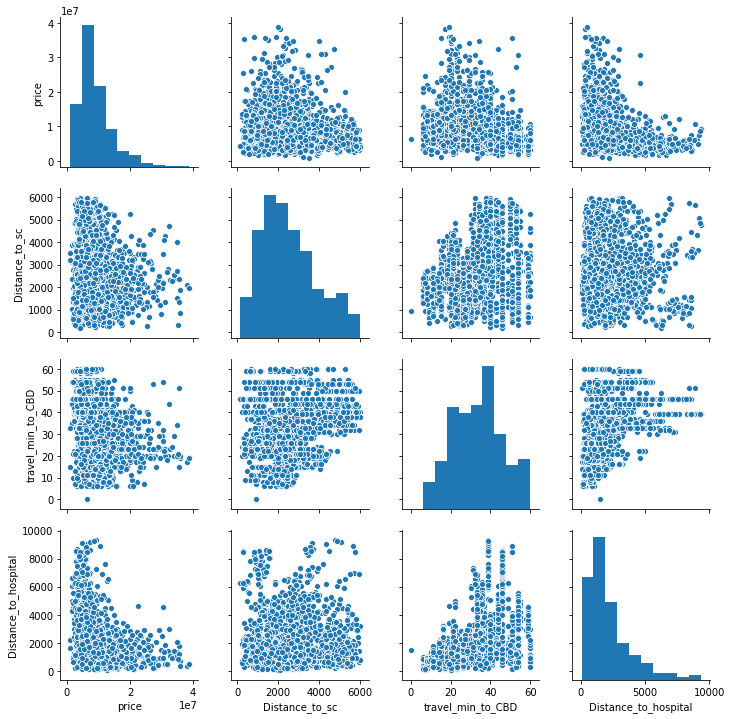

In [32]:
from seaborn import pairplot
pairplot(df_realState[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])

#### Assumption: Linearity <br>
**In terms of linear regression assumption, first if check the linearity of price with other featuers, there is no linear relation, as we can see from above graph.**<br>
**Since, this assumption is violated we will apply nonlinear transformation to the independent and/or dependent variable. Such asa log, standardisation, minmax, power, and box cox on the independent and/or dependent variable.**

### 1. Standardisation

In [33]:
# first transformation is Standardisation
std_scale = preprocessing.StandardScaler().fit(df_realState[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])
df_std = std_scale.transform(df_realState[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']]) # an array not a df
# put it alongside data... to view
df_realState_standard = df_realState.copy()
df_realState_standard['Pscaled'] = df_std[:,0] # price scaled
df_realState_standard['DSCscaled'] = df_std[:,1] # Distance_to_sc scaled
df_realState_standard['CBDscaled'] = df_std[:,2] # travel_min_to_CBD scaled
df_realState_standard['DHscaled'] = df_std[:,3] # Distance_to_hospital scaled
df_realState_standard.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Pscaled,DSCscaled,CBDscaled,DHscaled
0,61380,-37.796040,145.246498,164 Mullum Mullum Road,RINGWOOD,4000000.0,house,2012,3,1,...,46,1,hospital_164,1530,S_157,766,-0.917509,-0.085992,1.010857,-0.373958
1,59964,-37.821249,145.194442,403-405 Mitcham Road,MITCHAM,22820000.0,house,2016,3,1,...,40,1,hospital_010,1202,S_202,1629,2.383122,-0.907127,0.530983,-0.567058
2,2557,-37.820710,144.847792,9 Eames Avenue,BROOKLYN,8480000.0,house,2010,4,1,...,22,0,hospital_056,4564,S_056,1638,-0.131812,-1.396075,-0.908640,1.412215
3,7341,-37.747311,144.774634,23 Appian Drive,ALBANVALE,6080000.0,house,2012,3,2,...,33,0,hospital_057,3803,S_070,392,-0.552721,0.585099,-0.028870,0.964200
4,4324,-37.839367,144.877823,29 Elizabeth Street,NEWPORT,9100000.0,house,2009,4,2,...,21,0,hospital_141,2834,S_056,2794,-0.023077,0.399224,-0.988619,0.393731


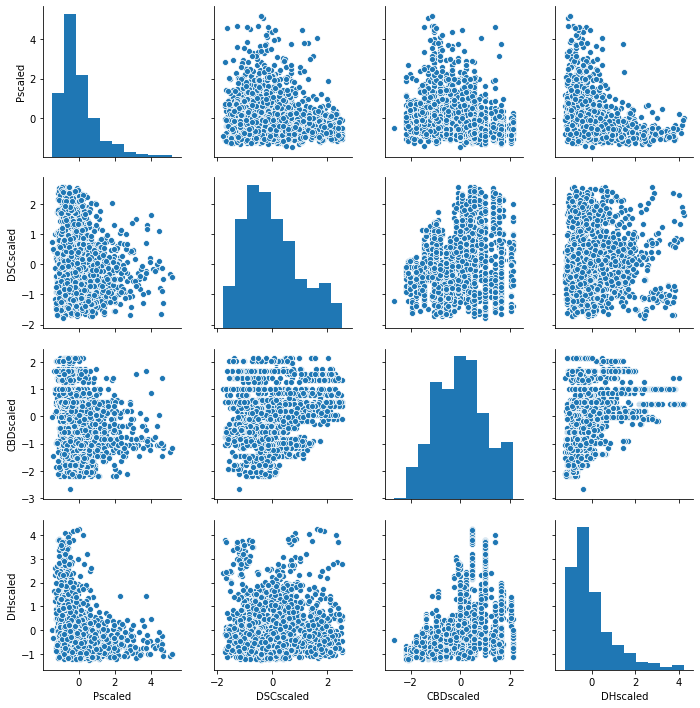

In [34]:
pairplot(df_realState_standard[['Pscaled','DSCscaled','CBDscaled','DHscaled']])

**After performing transformation, now we will check normality, means fit the model on data set and the residual should be independent and should be normally distributed.**

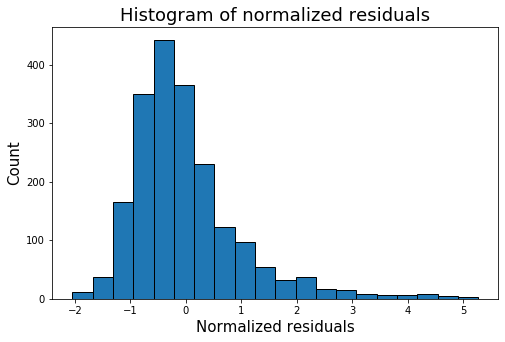

In [35]:
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb

df_realState_standard = df_realState_standard[['DSCscaled','CBDscaled','DHscaled','Pscaled']]
formula_str = df_realState_standard.columns[-1]+' ~ '+'+'.join(df_realState_standard.columns[:-1])
model=sm.ols(formula=formula_str, data=df_realState_standard) # apply linear model
fitted = model.fit() # fit the model

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k') # get residuals histogram
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

#### Assumption: Normality
**Normality in linear regression is just an assumption, and nothings wrong if they violate this assumption. From above graph we can see that residuals are not normally distributed and we can see some skweness. It's because there are more errors. It could be possible due to these reasons:<br>**
1. Maybe one or more important variables are missing for the model.<br>
2. Model we applied is not good for this data set as there were non linearity in the data.<br>

### 2. MinMax Noramlisation:

In [36]:
# Perform the MinMax transformation
minmax_scale = preprocessing.MinMaxScaler().fit(df_realState[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])
df_minmax = minmax_scale.transform(df_realState[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])

df_realState_minmax = df_realState.copy()

df_realState_minmax['Pscaled'] = df_minmax[:,0] # price scaled
df_realState_minmax['DSCscaled'] = df_minmax[:,1] # Distance_to_sc scaled
df_realState_minmax['CBDscaled'] = df_minmax[:,2] # travel_min_to_CBD scaled
df_realState_minmax['DHscaled'] = df_minmax[:,3] # Distance_to_hospital scaled


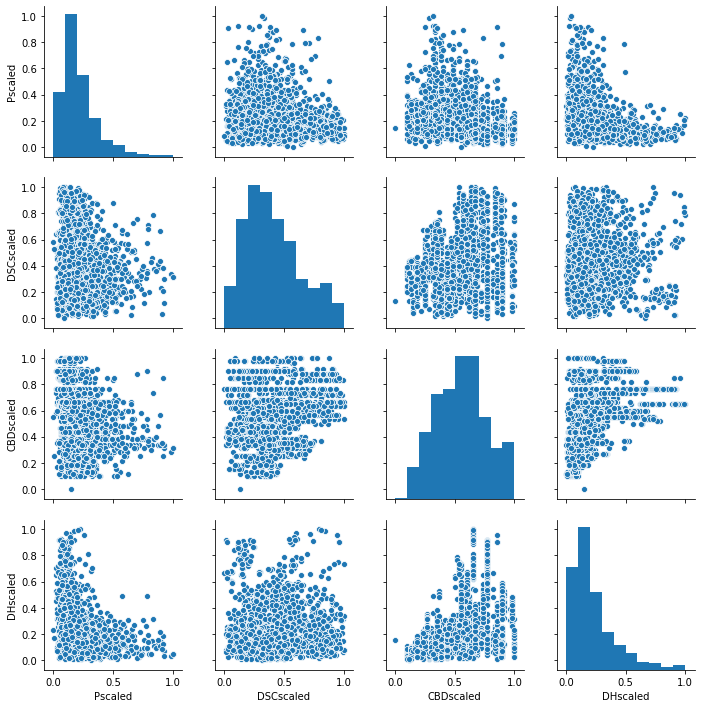

In [37]:
# plt.hist(df_realState_minmax.DSCscaled, density=True, bins=30)
# df_realState_minmax[['Pscaled','DSCscaled','CBDscaled','DHscaled']].hist()
# plt.show()
pairplot(df_realState_minmax[['Pscaled','DSCscaled','CBDscaled','DHscaled']])

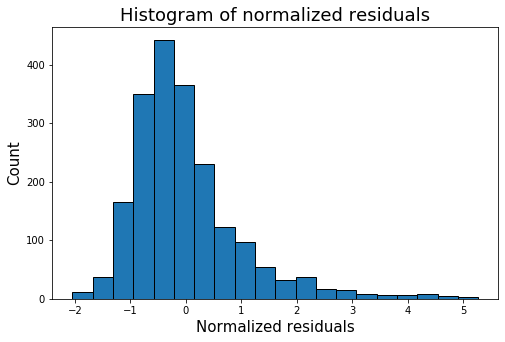

In [38]:
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb
df_realState_minmax = df_realState_minmax[['DSCscaled','CBDscaled','DHscaled','Pscaled']]
formula_str = df_realState_minmax.columns[-1]+' ~ '+'+'.join(df_realState_minmax.columns[:-1])
model=sm.ols(formula=formula_str, data=df_realState_minmax)
fitted = model.fit()

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

#### Assumption: Normality
**Normality in linear regression is just an assumption, and nothings wrong if they violate this assumption. From above graph we can see that residuals are not normally distributed and we can see some skweness. It's because there are more errors. It could be possible due to these reasons:<br>**
1. Maybe one or more important variables are missing for the model.<br>
2. Model we applied is not good for this data set as there were non linearity in the data.<br>

### 3. Log transformation:

In [39]:
from math import log
import math
df_realState_log = df_realState.copy()
df_realState_log['Pscaled'] = None
i = 0
for row in df_realState_log.iterrows():
    df_realState_log['Pscaled'].at[i] = math.log(df_realState_log["price"][i]) # log transformation
    i += 1

df_realState_log['DSCscaled'] = None
i = 0
for row in df_realState_log.iterrows():
    df_realState_log['DSCscaled'].at[i] = math.log(df_realState_log["Distance_to_sc"][i])  # log transformation
    i += 1
    
df_realState_log['CBDscaled'] = None
i = 0
for row in df_realState_log.iterrows():
    df_realState_log['CBDscaled'].at[i] = math.log(df_realState_log["travel_min_to_CBD"][i]+1)  # log transformation, padded 1 in log to avoid error for 0 values
    i += 1


df_realState_log['DHscaled'] = None
i = 0
for row in df_realState_log.iterrows():
    df_realState_log['DHscaled'].at[i] = math.log(df_realState_log["Distance_to_hospital"][i])  # log transformation
    i += 1

In [40]:
# Change the data type for scaled values.
df_realState_log.Pscaled = df_realState_log.Pscaled.astype('float')
df_realState_log.DSCscaled = df_realState_log.DSCscaled.astype('float')
df_realState_log.CBDscaled = df_realState_log.CBDscaled.astype('float')
df_realState_log.DHscaled = df_realState_log.DHscaled.astype('float')
# df_realState_log[['Pscaled','DSCscaled','CBDscaled','DHscaled']].hist()
# plt.show()
# df_realState_log[['Pscaled','DSCscaled','CBDscaled','DHscaled']].hist()

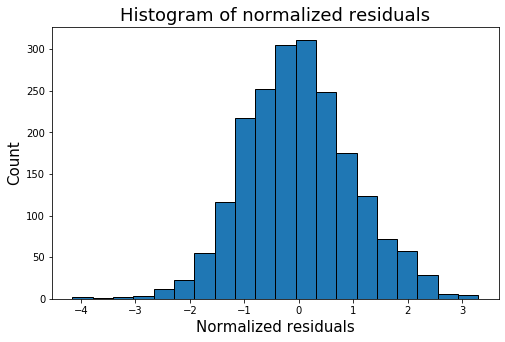

In [41]:
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb
df_realState_log = df_realState_log[['DSCscaled','CBDscaled','DHscaled','Pscaled']]
formula_str = df_realState_log.columns[-1]+' ~ '+'+'.join(df_realState_log.columns[:-1])
model=sm.ols(formula=formula_str, data=df_realState_log)
fitted = model.fit()

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

#### Assumption: Normality
**Normality in linear regression is just an assumption, and nothings wrong if they violate this assumption. From above graph we can see that residuals are normally distributed Means there are less errors. Let's check the linearity between the normalized target variable and input variables.<br>**
**From below graph we can see that after performing normalization, and hence performans of model has improved.**

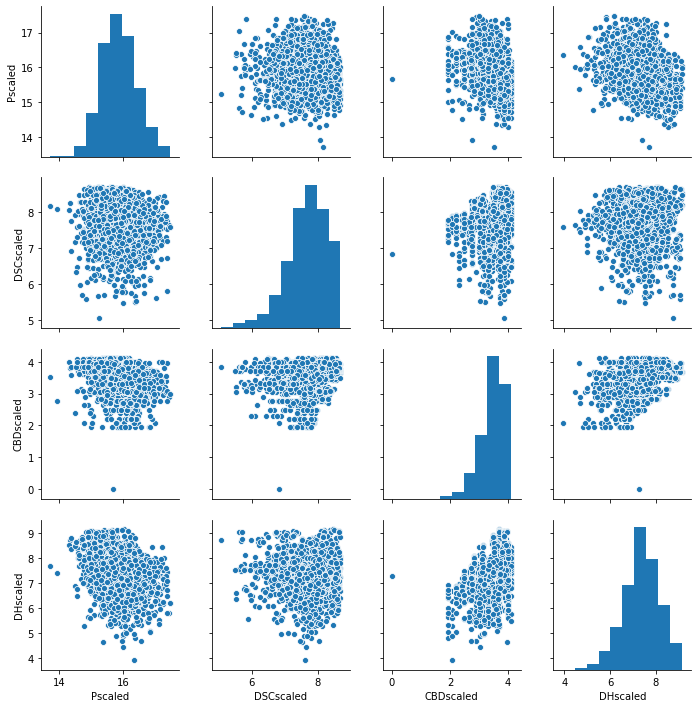

In [42]:
pairplot(df_realState_log[['Pscaled','DSCscaled','CBDscaled','DHscaled']])

### 4. Square power transformation

In [43]:
import math

df_realState_power = df_realState.copy()
df_realState_power['Pscaled'] = None
i = 0
for row in df_realState_power.iterrows():
    df_realState_power['Pscaled'].at[i] = math.pow(df_realState_power["price"][i],2) # power transformation
    i += 1

df_realState_power['DSCscaled'] = None
i = 0
for row in df_realState_power.iterrows():
    df_realState_power['DSCscaled'].at[i] = math.pow(df_realState_power["Distance_to_sc"][i],2) # power transformation
    i += 1

df_realState_power['CBDscaled'] = None
i = 0
for row in df_realState_power.iterrows():
    df_realState_power['CBDscaled'].at[i] = math.pow(df_realState_power["travel_min_to_CBD"][i],2) # power transformation
    i += 1

df_realState_power['DHscaled'] = None
i = 0
for row in df_realState_power.iterrows():
    df_realState_power['DHscaled'].at[i] = math.pow(df_realState_power["Distance_to_hospital"][i],2) # power transformation
    i += 1

In [44]:
# plt.hist(df_realState_power.Distance_to_sc, density=True, bins=30)
df_realState_power.Pscaled = df_realState_power.Pscaled.astype('float')
df_realState_power.DSCscaled = df_realState_power.DSCscaled.astype('float')
df_realState_power.CBDscaled = df_realState_power.CBDscaled.astype('float')
df_realState_power.DHscaled = df_realState_power.DHscaled.astype('float')
# df_realState_power[['Pscaled','DSCscaled','CBDscaled','DHscaled']].hist()
# plt.show()

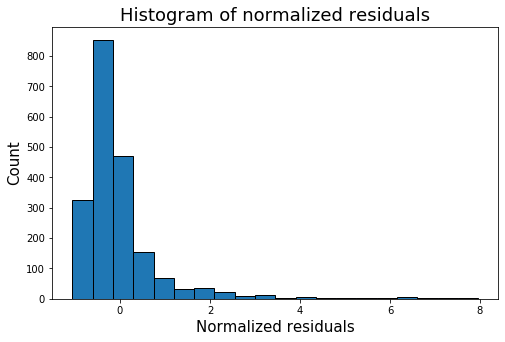

In [45]:
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb
df_realState_power = df_realState_power[['DSCscaled','CBDscaled','DHscaled','Pscaled']]
formula_str = df_realState_power.columns[-1]+' ~ '+'+'.join(df_realState_power.columns[:-1])
model=sm.ols(formula=formula_str, data=df_realState_power)
fitted = model.fit()

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

#### Assumption: Normality
**Normality in linear regression is just an assumption, and nothings wrong if they violate this assumption. From above graph we can see that residuals are not normally distributed and there is large skewness. It's because after performing power transformation, non linearity between target and input variable as increased. And due to this we have large errors.**

### 5. Box Cox Transformer

In [46]:
from sklearn.preprocessing import PowerTransformer

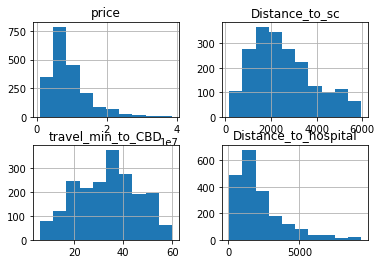

In [47]:
df_realState_box = df_realState[df_realState['travel_min_to_CBD']!=0] # remove rows where input variable is zero
df_realState_box[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']].hist()
plt.show()

In [48]:
pt = PowerTransformer(method='box-cox') # box cox transformation
df_realState_box_cox = pt.fit_transform(df_realState_box[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])
dataset = pd.DataFrame(df_realState_box_cox) # convert normalized data it back to dataframe
dataset.rename({0:'Pscaled', 1:'DSCscaled', 2:'CBDscaled', 3:'DHscaled'}, axis = 1, inplace=True) # rename columns
dataset.head()

,Pscaled,DSCscaled,CBDscaled,DHscaled
0,-1.236113,0.071116,1.005874,-0.133638
1,1.847375,-0.892245,0.545040,-0.432384
2,0.159431,-1.718617,-0.900006,1.363146
3,-0.445775,0.681588,-0.004158,1.096023
4,0.285265,0.523119,-0.983995,0.680391


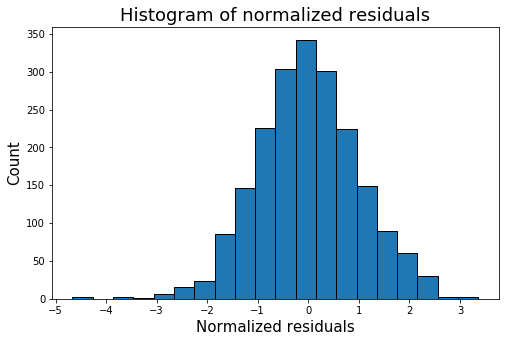

In [49]:
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb
dataset = dataset[['DSCscaled','CBDscaled','DHscaled','Pscaled']]
formula_str = dataset.columns[-1]+' ~ '+'+'.join(dataset.columns[:-1])
model=sm.ols(formula=formula_str, data=dataset)
fitted = model.fit()

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()


#### Assumption: Normality
**Normality in linear regression is just an assumption, and nothings wrong if they violate this assumption. From above graph we can see that residuals are normally distributed Means there are less errors. Let's check the linearity between the normalized target variable and input variables.<br>**
**From below graph we can see that after performing normalization, and hence performans of model has improved.**

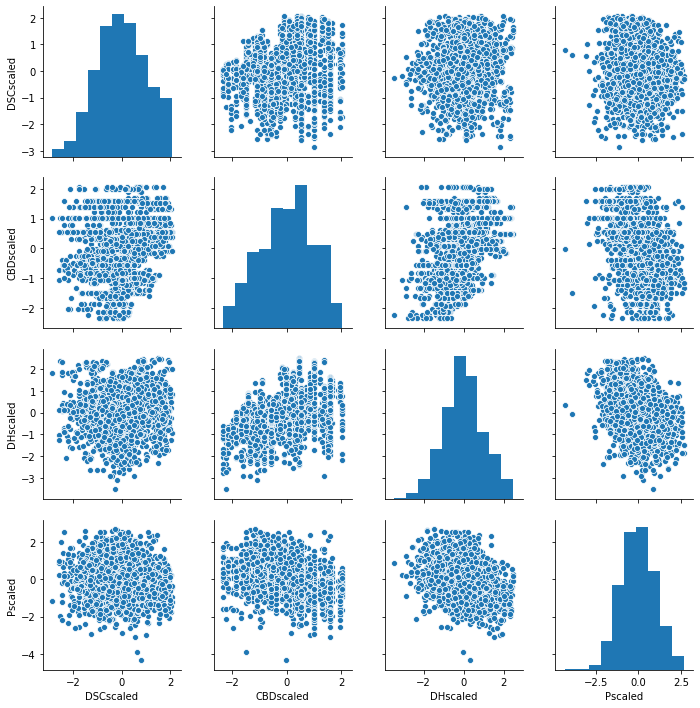

In [50]:
pairplot(dataset)